### Can you predict the Click Through Rate (CTR) of an email campaign?

### Problem statement

#### Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


####Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


#### CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


#### CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered

#### CTR depends on multiple factors like design, content, personalization, etc. 

#### How do you design the email content effectively?
#### What should your subject line look like?
#### What should be the length of the email?
#### Do you need images in your email template?

#### As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.
 
 
### Objective
#### Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.



### Variable : Description

#### campaign_id : Unique identifier of a campaign

#### sender : Sender of an e-mail

#### subject_len : No. of characters in a subject

#### body_len : No. of characters in an email body

#### mean_paragraph_len : Average no. of characters in paragraph of an email

#### day_of_week : Day on which email is sent

#### is_weekend : Boolean flag indicating if an email is sent on weekend or not

#### times_of_day : Times of day when email is sent: Morning, Noon, Evening

#### category : Category of the product an email is related to

#### product : Type of the product an email is related to

#### no_of_CTA : No. of Call To Actions in an email

#### mean_CTA_len : Average no. of characters in a CTA 

#### is_image : No. of images in an email

#### is_personalised : Boolean flag indicating if an email is personalized to the user or not

#### is_quote : No. of quotes in an email

#### is_timer : Boolean flag indicating if an email contains a timer or not

#### is_emoticons : No. of emoticons in an email

#### is_discount : Boolean flag indicating if an email contains a discount or not

#### is_price : Boolean flag indicating if an email contains price or not

#### is_urgency : Boolean flag indicating if an email contains urgency or not

#### target_audience : Cluster label of the target audience

#### click_rate (Target Variable) : Click rate of an email campaign

#### Data Dictionary
#### don't have click_rate

## Table of Contents

### Step 1: Importing the Relevant Libraries
### Step 2: Data Inspection
### Step 3: Data Cleaning
### Step 4: Exploratory Data Analysis
### Step 5: Building Model


## Step 1: Importing the Relevant Libraries

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2 : Data inspection

In [129]:
train = pd.read_csv("/train_F3fUq2S.csv")
test = pd.read_csv("/test_Bk2wfZ3.csv")

In [130]:
train.shape,test.shape

((1888, 22), (762, 21))

In [131]:
train.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [132]:
test.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


## Step 2: Data Inspection

#### We have 1888 rows and 22 columns in Train set whereas Test set has 762 rows and 21 columns.

In [137]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
click_rate            0.0
dtype: float64

In [138]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
dtype: float64

In [139]:
# show the data types for each column of the train set
train.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [140]:
# show the data types for each column of the train set
test.dtypes

campaign_id            int64
sender                 int64
subject_len            int64
body_len               int64
mean_paragraph_len     int64
day_of_week            int64
is_weekend             int64
times_of_day          object
category               int64
product                int64
no_of_CTA              int64
mean_CTA_len           int64
is_image               int64
is_personalised        int64
is_quote               int64
is_timer               int64
is_emoticons           int64
is_discount            int64
is_price               int64
is_urgency             int64
target_audience        int64
dtype: object

In [141]:
train['speciality']=train["is_image"]+train["is_personalised"]+train["is_quote"]+train["is_timer"]+train["is_emoticons"]+train["is_discount"]+train["is_price"]+train["is_urgency"]

In [142]:
test['speciality']=test["is_image"]+test["is_personalised"]+test["is_quote"]+test["is_timer"]+test["is_emoticons"]+test["is_discount"]+test["is_price"]+test["is_urgency"]

In [143]:
train=train.drop(['is_image','is_personalised','is_quote','is_timer','is_emoticons','is_discount','is_price','is_urgency'],axis=1)

In [144]:
test=test.drop(['is_image','is_personalised','is_quote','is_timer','is_emoticons','is_discount','is_price','is_urgency'],axis=1)

In [145]:
train.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,target_audience,click_rate,speciality
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,14,0.103079,0
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,10,0.700000,0
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,16,0.002769,2
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,10,0.010868,0
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,14,0.142826,1


In [146]:
test.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,target_audience,speciality
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,14,2
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,10,0
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,10,2
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,10,2
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,14,0


In [147]:
train['content_len']=train["subject_len"]*train["product"]*train["category"]+train["body_len"]*train["product"]*train["category"]+train["mean_paragraph_len"]*train["product"]*train["category"]

In [148]:
train=train.drop(['subject_len','body_len','mean_paragraph_len'],axis=1)

In [149]:
test['content_len']=test["subject_len"]*test["product"]*test["category"]+test["body_len"]*test["product"]*test["category"]+test["mean_paragraph_len"]*test["product"]*test["category"]

In [150]:
test=test.drop(['subject_len','body_len','mean_paragraph_len'],axis=1)

In [151]:
train.head(5)

,campaign_id,sender,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,target_audience,click_rate,speciality,content_len
0,1,3,5,1,Noon,6,26,3,29,14,0.103079,0,1646424
1,2,3,5,1,Morning,2,11,0,22,10,0.700000,0,63360
2,3,3,5,1,Noon,2,11,3,23,16,0.002769,2,283272
3,4,3,4,0,Evening,15,9,4,24,10,0.010868,0,1504035
4,5,3,5,1,Noon,6,26,3,31,14,0.142826,1,1578408


In [152]:
test.head(5)

,campaign_id,sender,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,target_audience,speciality,content_len
0,1889,3,6,1,Noon,6,26,3,37,14,2,2019108
1,1890,3,5,1,Morning,2,11,0,22,10,0,63338
2,1891,3,4,0,Evening,2,11,0,22,10,2,36058
3,1892,3,3,0,Evening,2,11,0,22,10,2,36058
4,1893,3,3,0,Noon,6,26,2,40,14,0,1423812


In [153]:
train['Total_CTA']=train["mean_CTA_len"]*train["no_of_CTA"]

In [154]:
test['Total_CTA']=test["mean_CTA_len"]*test["no_of_CTA"]

In [155]:
train=train.drop(['sender','no_of_CTA','mean_CTA_len'],axis=1)

In [156]:
test=test.drop(['sender','no_of_CTA','mean_CTA_len'],axis=1)

In [157]:
train.head(5)

,campaign_id,day_of_week,is_weekend,times_of_day,category,product,target_audience,click_rate,speciality,content_len,Total_CTA
0,1,5,1,Noon,6,26,14,0.103079,0,1646424,87
1,2,5,1,Morning,2,11,10,0.700000,0,63360,0
2,3,5,1,Noon,2,11,16,0.002769,2,283272,69
3,4,4,0,Evening,15,9,10,0.010868,0,1504035,96
4,5,5,1,Noon,6,26,14,0.142826,1,1578408,93


In [158]:
test.head(5)

,campaign_id,day_of_week,is_weekend,times_of_day,category,product,target_audience,speciality,content_len,Total_CTA
0,1889,6,1,Noon,6,26,14,2,2019108,111
1,1890,5,1,Morning,2,11,10,0,63338,0
2,1891,4,0,Evening,2,11,10,2,36058,0
3,1892,3,0,Evening,2,11,10,2,36058,0
4,1893,3,0,Noon,6,26,14,0,1423812,80


#### We have no missing value in the train data and test data

## Step 2: Data Cleaning

### There is no data cleaning

In [159]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 10


In [160]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 1
Numerical Features in Test Set: 9


#### Target Variable (Categorical)

In [161]:
# frequency table of a variable will give us the count of each category in that variable
train['times_of_day'].value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

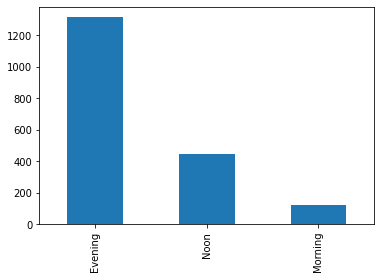

In [162]:
# bar plot to visualize the frequency
train['times_of_day'].value_counts().plot.bar()

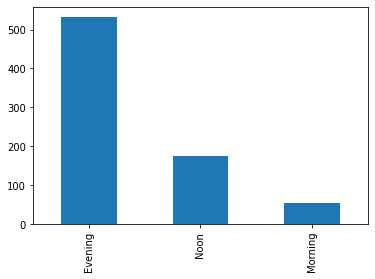

In [163]:
# bar plot to visualize the frequency
test['times_of_day'].value_counts().plot.bar()

Text(0.5, 1.0, 'Test')

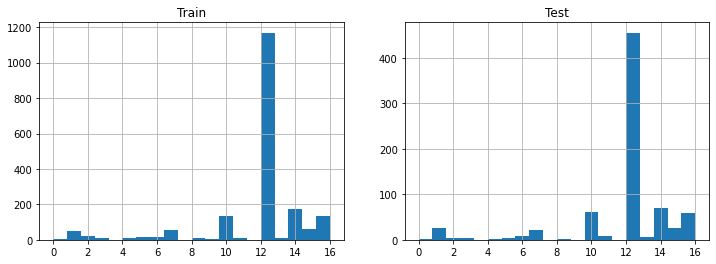

In [164]:
ax1 = plt.subplot(121)
train['target_audience'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['target_audience'].hist(bins=20)
ax2.set_title("Test")

,campaign_id,day_of_week,is_weekend,category,product,target_audience,click_rate,speciality,content_len,Total_CTA
campaign_id,1.000000,0.036410,0.051932,0.289416,0.209435,-0.104905,0.053315,-0.042091,0.314826,0.137530
day_of_week,0.036410,1.000000,0.720599,-0.058760,0.000249,0.081693,0.086372,-0.013903,-0.076580,-0.014324
is_weekend,0.051932,0.720599,1.000000,-0.063763,-0.015759,0.046638,0.114138,-0.036317,-0.066094,-0.027308
category,0.289416,-0.058760,-0.063763,1.000000,0.007144,-0.026602,-0.167756,0.068555,0.324242,0.013539
product,0.209435,0.000249,-0.015759,0.007144,1.000000,0.058073,0.121602,-0.060704,0.688595,0.047949
target_audience,-0.104905,0.081693,0.046638,-0.026602,0.058073,1.000000,0.038713,0.014412,-0.002673,0.005323
click_rate,0.053315,0.086372,0.114138,-0.167756,0.121602,0.038713,1.000000,-0.030946,-0.077143,-0.120957
speciality,-0.042091,-0.013903,-0.036317,0.068555,-0.060704,0.014412,-0.030946,1.000000,-0.033937,-0.009589
content_len,0.314826,-0.076580,-0.066094,0.324242,0.688595,-0.002673,-0.077143,-0.033937,1.000000,0.271672
Total_CTA,0.137530,-0.014324,-0.027308,0.013539,0.047949,0.005323,-0.120957,-0.009589,0.271672,1.000000


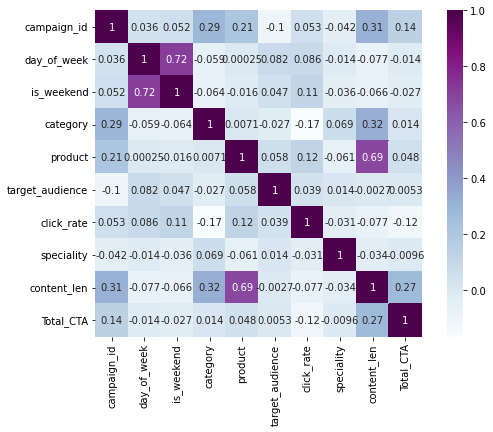

In [165]:
# calculate and visualize correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

In [ ]:
train['times_of_day'] = pd.to_numeric(train['times_of_day'], errors='coerce')

In [ ]:
test['times_of_day'] = pd.to_numeric(test['times_of_day'], errors='coerce')

In [183]:
train['times_of_day'] = train['times_of_day'].astype(str)

In [184]:
test['times_of_day']=test['times_of_day'].astype(str)

### Step 4: Exploratory Data Analysis

#### There is no irrelevent features to edit

In [185]:
train.columns

test.columns

Index(['campaign_id', 'times_of_day', 'is_weekend_0', 'is_weekend_1',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5',
       ...
       'target_audience_6', 'target_audience_7', 'target_audience_8',
       'target_audience_9', 'target_audience_10', 'target_audience_11',
       'target_audience_12', 'target_audience_13', 'target_audience_14',
       'target_audience_15'],
      dtype='object', length=1772)

In [187]:
train['times_of_day'] = train['times_of_day'].apply(lambda x: x[0:2])
train['times_of_day'] = train['times_of_day'].map({'E':'Evinening',
                                                             'N':'Noon',
                                                             'M':'Morning'})

test['times_of_day'] = test['times_of_day'].apply(lambda x: x[0:2])
test['times_of_day'] = test['times_of_day'].map({'E':'Evinening',
                                                             'N':'Noon',
                                                             'M':'Morning'})

TypeError: ignored

In [188]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
train['Campaign'] = le.fit_transform(train['campaign_id'])
var_mod = ['is_weekend','day_of_week','Total_CTA','content_len','speciality','Campaign','category','product','target_audience']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
#One Hot Coding:
train = pd.get_dummies(train, columns=['is_weekend','day_of_week','Total_CTA','content_len','speciality','Campaign','category','product','target_audience'])

KeyError: ignored

In [171]:

#New variable for outlet
test['Campaign'] = le.fit_transform(test['campaign_id'])
var_mod = ['is_weekend','day_of_week','Total_CTA','content_len','speciality','Campaign','category','product','target_audience']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
    
#One Hot Coding:
test = pd.get_dummies(test, columns=['is_weekend','day_of_week','Total_CTA','content_len','speciality','Campaign','category','product','target_audience'])

### Step 6: Building Model

In [189]:
train.columns

Index(['campaign_id', 'times_of_day', 'click_rate', 'is_weekend_0',
       'is_weekend_1', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4',
       ...
       'target_audience_8', 'target_audience_9', 'target_audience_10',
       'target_audience_11', 'target_audience_12', 'target_audience_13',
       'target_audience_14', 'target_audience_15', 'target_audience_16',
       'Campaign'],
      dtype='object', length=3966)

In [190]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [191]:
# Seperate Features and Target
X= train.drop(columns = ['click_rate'], axis=1)
y= train['click_rate']

In [192]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

#### KNN

In [85]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [89]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [92]:
Y_pred_knn = knn.predict(X_valid)


#### Linear regression

In [90]:
lin_reg = LinearRegression()


In [93]:
lin_reg.fit(X_train, y_train)
Y_pred_lin_reg = lin_reg.predict(X_valid)

#### decision tree

In [94]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [95]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [96]:
Y_pred_dec = dec_tree.predict(X_valid)

#### Random forrest regressior

In [97]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [98]:
ran_for.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
Y_pred_ran_for = ran_for.predict(X_valid)

#### XGB regressior

In [99]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 50)

In [100]:
xgb.fit(X_train, y_train)

[11:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=50)

In [101]:
Y_pred_xgb = xgb.predict(X_valid)

Model Evaluation

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_valid, Y_pred_lin_reg)))
print("R2 score:", r2_score(y_valid, Y_pred_lin_reg))

Linear Regression: 
RMSE: 0.07230637964565262
R2 score: 0.2658446609417907


In [106]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_valid, Y_pred_knn)))
print("R2 score:", r2_score(y_valid, Y_pred_knn))

KNN regression: 
RMSE: 0.08417346414364708
R2 score: 0.005086946430237438


In [107]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_valid, Y_pred_dec)))
print("R2 score:", r2_score(y_valid, Y_pred_dec))

Decision tree regression: 
RMSE: 0.07713851820563365
R2 score: 0.1644406347325903


In [108]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_valid, Y_pred_ran_for)))
print("R2 score:", r2_score(y_valid, Y_pred_ran_for))

Random forest regression: 


NameError: ignored

In [109]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_valid, Y_pred_xgb)))
print("R2 score:", r2_score(y_valid, Y_pred_xgb))

XGB regression: 
RMSE: 0.07335713075903205
R2 score: 0.24435223899926095


In [116]:
# import library

from sklearn.model_selection import train_test_split

In [117]:
# split the data into train and cross validation set

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [118]:
# take a look at the dimension of the data

x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((1321, 3963), (567, 3963), (1321,), (567,))

In [119]:
# import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [120]:
# import StratifiedKFold from sklearn and fit the model

from sklearn.model_selection import StratifiedKFold

In [121]:
# import library

from sklearn import tree


In [127]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred3=model.predict_proba(test)[:,1]

# warnings.filterwarnings(action='ignore', category=DeprecationWarning)

ValueError: ignored

In [123]:
submission = pd.read_csv("/sample_submission_LJ2N3ZQ.csv")

In [125]:
# filling Loan_Status with predictions

submission['click_rate'] = pred_test            

# filling Loan_ID with test Loan_ID

submission['campaign_ID'] = test_original['campaign_ID'] 

NameError: ignored

In [124]:
# replacing 0 and 1 with N and Y

submission['click_rate']
submission['click_rate']

0      0.043454
1      0.043454
2      0.043454
3      0.043454
4      0.043454
         ...   
757    0.043454
758    0.043454
759    0.043454
760    0.043454
761    0.043454
Name: click_rate, Length: 762, dtype: float64

In [126]:
# Converting submission file to .csv format
submission.to_csv('/Decision_Tree_prediction.csv', index=False)

* __Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.__

__RMSE__

In [193]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.07256724528805233


* __Validation Set RMSE score is around 1187 from this linear model__

In [194]:
submission = pd.read_csv('/sample_submission_LJ2N3ZQ.csv')
final_predictions = LR.predict(test)
submission['click_rate'] = final_predictions
#only positive predictions for the target variable
submission['click_rate'] = submission['click_rate'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('/sample_submission.csv', index=False)

ValueError: ignored

In [ ]:
#### seperating into X and Y

X = train.drop(['campaign_id',"times_of_day"], axis = 1)
Y = train['Total_CTA']

In [ ]:
print (X)

      day_of_week  is_weekend  category  product  target_audience  click_rate  \
0               5           1         6       26               14    0.103079   
1               5           1         2       11               10    0.700000   
2               5           1         2       11               16    0.002769   
3               4           0        15        9               10    0.010868   
4               5           1         6       26               14    0.142826   
...           ...         ...       ...      ...              ...         ...   
1883            2           0         2       11               10    0.350746   
1884            2           0         2       11               11    0.004728   
1885            1           0        15        9                6    0.008289   
1886            1           0         2       11               16    0.012014   
1887            0           0        15        9               10    0.003644   

      speciality  content_l

In [ ]:
print (Y)

0        87
1         0
2        69
3        96
4        93
       ... 
1883      0
1884    135
1885    112
1886    135
1887    112
Name: Total_CTA, Length: 1888, dtype: int64


In [ ]:
# show the data types for each column of the train set
train.dtypes

campaign_id          int64
day_of_week          int64
is_weekend           int64
times_of_day       float64
category             int64
product              int64
target_audience      int64
click_rate         float64
speciality           int64
content_len          int64
Total_CTA            int64
dtype: object

In [ ]:
# show the data types for each column of the train set
test.dtypes

campaign_id          int64
day_of_week          int64
is_weekend           int64
times_of_day       float64
category             int64
product              int64
target_audience      int64
speciality           int64
content_len          int64
Total_CTA            int64
dtype: object

In [ ]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

campaign_id          0.0
day_of_week          0.0
is_weekend           0.0
times_of_day       100.0
category             0.0
product              0.0
target_audience      0.0
click_rate           0.0
speciality           0.0
content_len          0.0
Total_CTA            0.0
dtype: float64

In [ ]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

campaign_id          0.0
day_of_week          0.0
is_weekend           0.0
times_of_day       100.0
category             0.0
product              0.0
target_audience      0.0
speciality           0.0
content_len          0.0
Total_CTA            0.0
dtype: float64

#### there is some missing values

## Step 2: Data cleaning

In [ ]:
# Imputing with Mean
train['times_of_day']= train['times_of_day'].fillna(train['times_of_day'].mode())
test['times_of_day']= test['times_of_day'].fillna(test['times_of_day'].mode())

In [ ]:
train['times_of_day'].isnull().sum(),test['times_of_day'].isnull().sum()

(1888, 762)

In [ ]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

campaign_id          0.0
day_of_week          0.0
is_weekend           0.0
times_of_day       100.0
category             0.0
product              0.0
target_audience      0.0
click_rate           0.0
speciality           0.0
content_len          0.0
Total_CTA            0.0
dtype: float64

#### Test data is further divided into Public (40%) and Private (60%)

In [ ]:
#### test into 40% public data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 50)


In [ ]:
regressor= RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[5.00000e+01 8.33610e+02 0.00000e+00 6.28400e+01 1.10920e+02 2.96790e+02
 9.60000e+01 5.00000e+01 8.40000e+01 2.36800e+01 6.21700e+01 2.29110e+02
 9.00000e+01 1.19300e+01 1.04000e+02 8.00000e+01 1.69220e+02 0.00000e+00
 1.16000e+02 1.31980e+02 3.46710e+02 9.81400e+01 6.90900e+01 1.05000e+02
 2.65550e+02 1.40000e+02 3.39400e+01 1.20000e+02 1.55930e+02 5.00000e+01
 5.00000e+01 6.60000e+01 9.20000e+01 3.44650e+02 6.90300e+01 6.90800e+01
 9.58600e+01 1.96590e+02 7.79500e+01 8.79800e+01 0.00000e+00 7.80400e+01
 1.02000e+02 1.04000e+02 1.69300e+02 1.35010e+02 0.00000e+00 6.60000e+01
 2.10300e+01 4.50000e+01 1.00200e+01 4.41400e+01 2.16410e+02 1.80020e+02
 1.20000e+02 9.20000e+01 1.81700e+02 1.63100e+01 0.00000e+00 5.80000e+01
 5.80000e+01 1.59830e+02 2.39700e+01 7.80000e+01 1.35138e+03 5.10810e+02
 1.35000e+02 7.50000e+01 1.44210e+02 1.49930e+02 1.27880e+02 1.05000e+02
 1.35800e+01 1.07980e+02 1.44720e+02 2.42009e+03 0.00000e+00 7.00600e+01
 1.55940e+02 2.69210e+02 9.89700e+01 9.57700e+01 1.

In [ ]:
error_score= metrics.r2_score(Y_test,test_data_prediction)
error_score

0.9821587935326865

In [ ]:
Y_test = list(Y_test)

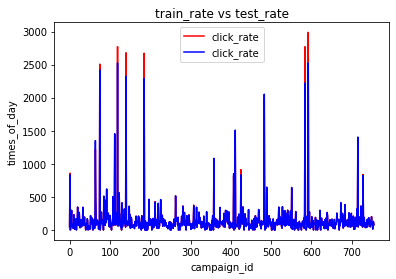

In [ ]:
plt.plot(Y_test, color='red', label = 'click_rate')
plt.plot(test_data_prediction, color='blue', label = 'click_rate')
plt.title('train_rate vs test_rate')
plt.xlabel('campaign_id')
plt.ylabel('times_of_day')
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
from xgboost.sklearn import XGBModel
submission = pd.read_csv('/sample_submission_LJ2N3ZQ.csv')
final_predictions= xgbm.predict(test_data_prediction)
submission['Click_rate'] = final_predictions
#only positive predictions for the target variable
submission['click_rate'] = submission['click_rate'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('/my_submission.csv', index=False)